In [1]:
%matplotlib inline

In [115]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import quandl
import functools
import seaborn as sns
from datetime import datetime
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

# Data

### ETFs data

In [3]:
FCOM_data = quandl.get_table('QUOTEMEDIA/PRICES',ticker='FCOM', 
                      date={'gte':'2019-12-02','lte':'2021-12-31'},
                      api_key='ekQugP6HMTsnb9LUpzsi').set_index('date')          #personal API key for Nasdaq data

In [4]:
FCOM_data.head()

,ticker,open,high,low,close,volume,dividend,split,adj_open,adj_high,adj_low,adj_close,adj_volume
date,,,,,,,,,,,,,
2021-12-31,FCOM,51.92,52.0500,51.3500,51.36,62415.0,0.0,1.0,51.92,52.0500,51.3500,51.36,62415.0
2021-12-30,FCOM,51.82,52.2900,51.8200,52.00,44276.0,0.0,1.0,51.82,52.2900,51.8200,52.00,44276.0
2021-12-29,FCOM,51.89,51.9198,51.5900,51.75,78230.0,0.0,1.0,51.89,51.9198,51.5900,51.75,78230.0
2021-12-28,FCOM,52.12,52.5000,51.9500,51.97,85301.0,0.0,1.0,52.12,52.5000,51.9500,51.97,85301.0
2021-12-27,FCOM,51.85,52.2000,51.7767,52.07,69257.0,0.0,1.0,51.85,52.2000,51.7767,52.07,69257.0


In [5]:
FCOM_data = FCOM_data[['adj_close','adj_volume']].sort_values(by='date')

In [6]:
FCOM_data['usd_volume'] = FCOM_data['adj_close']*FCOM_data['adj_volume']

In [7]:
FCOM_data['15_median'] = FCOM_data[['usd_volume']].rolling(window=15, min_periods=1).median()

In [8]:
#daily return on FCOM
FCOM_data['return'] = (FCOM_data['adj_close']/FCOM_data['adj_close'].shift(1)-1).fillna(0)

In [9]:
FCOM_data.head()

,adj_close,adj_volume,usd_volume,15_median,return
date,,,,,
2019-12-02,34.027521,100877.0,3.432594e+06,3.432594e+06,0.000000
2019-12-03,34.007920,58160.0,1.977901e+06,2.705247e+06,-0.000576
2019-12-04,34.154928,59115.0,2.019069e+06,2.019069e+06,0.004323
2019-12-05,34.292136,54791.0,1.878900e+06,1.998485e+06,0.004017
2019-12-06,34.507748,43170.0,1.489699e+06,1.977901e+06,0.006288


In [10]:
VOX_data = quandl.get_table('QUOTEMEDIA/PRICES',ticker='VOX', 
                      date={'gte':'2019-12-02','lte':'2021-12-31'},
                      api_key='ekQugP6HMTsnb9LUpzsi').set_index('date')  

In [11]:
VOX_data.head()

,ticker,open,high,low,close,volume,dividend,split,adj_open,adj_high,adj_low,adj_close,adj_volume
date,,,,,,,,,,,,,
2021-12-31,VOX,136.87,137.3300,135.510,135.56,78065.0,0.0,1.0,136.87,137.3300,135.510,135.56,78065.0
2021-12-30,VOX,136.78,137.9900,136.780,137.19,114214.0,0.0,1.0,136.78,137.9900,136.780,137.19,114214.0
2021-12-29,VOX,137.10,137.5300,136.095,136.50,97534.0,0.0,1.0,137.10,137.5300,136.095,136.50,97534.0
2021-12-28,VOX,137.48,138.4700,137.040,137.23,119793.0,0.0,1.0,137.48,138.4700,137.040,137.23,119793.0
2021-12-27,VOX,136.81,137.7915,136.580,137.47,94772.0,0.0,1.0,136.81,137.7915,136.580,137.47,94772.0


In [12]:
VOX_data = VOX_data[['adj_close','adj_volume']].sort_values(by='date')

In [13]:
VOX_data['usd_volume'] = VOX_data['adj_close']*VOX_data['adj_volume']

In [14]:
VOX_data['15_median'] = VOX_data[['usd_volume']].rolling(window=15, min_periods=1).median()

In [15]:
#daily return on VOX
VOX_data['return'] = (VOX_data['adj_close']/VOX_data['adj_close'].shift(1)-1).fillna(0)

In [130]:
VOX_data.head()

,adj_close,adj_volume,usd_volume,15_median,return
date,,,,,
2019-12-02,89.300259,254779.0,2.275183e+07,2.275183e+07,0.000000
2019-12-03,89.163190,82284.0,7.336704e+06,1.504427e+07,-0.001535
2019-12-04,89.672303,69539.0,6.235722e+06,7.336704e+06,0.005710
2019-12-05,89.946440,63331.0,5.696398e+06,6.786213e+06,0.003057
2019-12-06,90.514296,98008.0,8.871125e+06,7.336704e+06,0.006313


### Fama-French data

In [17]:
FF_data = pd.read_csv('/Users/hongyuli/Documents/UChi/Winter_2022/FINM33150 Regression & Quant Trading/F-F_Research_Data_Factors_daily.CSV',skiprows=4,index_col=0)

In [18]:
FF_data.head()

,Mkt-RF,SMB,HML,RF
19260701,0.10,-0.23,-0.28,0.009
19260702,0.45,-0.34,-0.03,0.009
19260706,0.17,0.29,-0.38,0.009
19260707,0.09,-0.59,0.00,0.009
19260708,0.21,-0.38,0.18,0.009


In [19]:
FF_data.tail()  #data only to 11/30/2021

,Mkt-RF,SMB,HML,RF
20211124,0.30,0.02,-0.86,0.0
20211126,-2.22,-1.23,-0.93,0.0
20211129,1.11,-1.01,-0.87,0.0
20211130,-1.95,0.51,-1.12,0.0
Copyright 2021 Kenneth R. French,NaN,NaN,NaN,NaN


In [20]:
FF_data = FF_data.iloc[:-1,:]

In [21]:
FF_data.index.names = ['date']

In [22]:
FF_data.index = pd.to_datetime(FF_data.index)

In [23]:
FF_data = FF_data.loc['2019-12-02':'2021-11-30',:]

In [24]:
FF_data.head()

,Mkt-RF,SMB,HML,RF
date,,,,
2019-12-02,-0.87,-0.24,0.46,0.007
2019-12-03,-0.66,0.60,-0.83,0.007
2019-12-04,0.60,0.13,0.25,0.007
2019-12-05,0.13,-0.21,0.46,0.007
2019-12-06,0.91,0.24,0.39,0.007


# Exercise

## Try M = 30, g = 0.001, j = 0.0005, s = 1

### Calculating Nt, and potential number of shares traded for each ETF

Number of shared traded should be an integer. Thus, due to round-up reasons, there may be small discrepencies between total capital invested in FCOM and in VOX.

In [25]:
Spread_Reversion = pd.DataFrame()

In [26]:
Spread_Reversion['FCOM_15_med'] = FCOM_data['15_median']

In [27]:
Spread_Reversion['VOX_15_med'] = VOX_data['15_median']

In [28]:
#Nt: 15-day running median (as of any day given t) for the less liquid of the two ETFs
Spread_Reversion['Nt'] = np.minimum(Spread_Reversion['FCOM_15_med'],Spread_Reversion['VOX_15_med'])

In [29]:
Spread_Reversion.head()

,FCOM_15_med,VOX_15_med,Nt
date,,,
2019-12-02,3.432594e+06,2.275183e+07,3.432594e+06
2019-12-03,2.705247e+06,1.504427e+07,2.705247e+06
2019-12-04,2.019069e+06,7.336704e+06,2.019069e+06
2019-12-05,1.998485e+06,6.786213e+06,1.998485e+06
2019-12-06,1.977901e+06,7.336704e+06,1.977901e+06


In [30]:
#number of shares of FCOM traded if open a new position on that day
Spread_Reversion['FCOM_qty'] = round(Spread_Reversion['Nt']/100/FCOM_data['adj_close'],0)

In [31]:
#number of shares of VOX traded if open a new position on that day
Spread_Reversion['VOX_qty'] = round(Spread_Reversion['Nt']/100/VOX_data['adj_close'],0)

In [32]:
Spread_Reversion.head()

,FCOM_15_med,VOX_15_med,Nt,FCOM_qty,VOX_qty
date,,,,,
2019-12-02,3.432594e+06,2.275183e+07,3.432594e+06,1009.0,384.0
2019-12-03,2.705247e+06,1.504427e+07,2.705247e+06,795.0,303.0
2019-12-04,2.019069e+06,7.336704e+06,2.019069e+06,591.0,225.0
2019-12-05,1.998485e+06,6.786213e+06,1.998485e+06,583.0,222.0
2019-12-06,1.977901e+06,7.336704e+06,1.977901e+06,573.0,219.0


In [33]:
data = Spread_Reversion.copy()

### Given M, calculating the M-day rolling return 

In [34]:
def M_day_rolling_return(df,FCOM,VOX,M):
    """Calculate M-day rolling return on the spread given daily returns on FCOM and VOX;
    daily returns are relatively small, so it is reasonable to just sum it up rather than using compounding formula"""
    
    FCOM_copy = FCOM.copy()
    VOX_copy = VOX.copy()
    df_copy = df.copy()
    
    FCOM_copy['M_d_return'] = FCOM_copy['return'].rolling(window=M,min_periods=1).sum()
    VOX_copy['M_d_return'] = VOX_copy['return'].rolling(window=M,min_periods=1).sum()
    df_copy['M_d_return_spread'] = FCOM_copy['M_d_return'] - VOX_copy['M_d_return']
    
    return df_copy

In [35]:
Spread_Reversion = M_day_rolling_return(Spread_Reversion,FCOM_data,VOX_data,30)

In [36]:
Spread_Reversion.head()

,FCOM_15_med,VOX_15_med,Nt,FCOM_qty,VOX_qty,M_d_return_spread
date,,,,,,
2019-12-02,3.432594e+06,2.275183e+07,3.432594e+06,1009.0,384.0,0.000000
2019-12-03,2.705247e+06,1.504427e+07,2.705247e+06,795.0,303.0,0.000959
2019-12-04,2.019069e+06,7.336704e+06,2.019069e+06,591.0,225.0,-0.000428
2019-12-05,1.998485e+06,6.786213e+06,1.998485e+06,583.0,222.0,0.000532
2019-12-06,1.977901e+06,7.336704e+06,1.977901e+06,573.0,219.0,0.000506


### Given g and j, return enter signals and exit signals

In [37]:
#g: bound to enter a position; 
#j: bound to exit a position

In [38]:
#enter position: -1: short(spread>g); +1: long(spread<-g); 0: no signal of entering (-g<spread<g)
#exit position: +1: exit from short(spread<j); -1: exit from long(spread>-j)

In [39]:
"""pairs: (enter_signal,exit_signal):
(-1,-1): s>g
(0,-1): j<s<g
(0,0): -j<s<j
(0,+1): -g<s<-j
(+1,+1): s<-g"""

'pairs(enter_signal,exit_signal):\n(-1,-1): s>g\n(0,-1): j<s<g\n(0,0): -j<s<j\n(0,+1): -g<s<-j\n(+1,+1): s<-g'

In [40]:
def signals(df,g,j):
    df_copy = df.copy()
    
    df_copy['enter_signal'] = (df_copy['M_d_return_spread']>g)*(-1)+(df_copy['M_d_return_spread']<-g)*1  
    df_copy['exit_signal'] = (df_copy['M_d_return_spread']>-j)*(-1)+(df_copy['M_d_return_spread']<j)*1   
    
    return df_copy

In [41]:
Spread_Reversion = signals(Spread_Reversion,.001,.0005)

In [42]:
Spread_Reversion.head()

,FCOM_15_med,VOX_15_med,Nt,FCOM_qty,VOX_qty,M_d_return_spread,enter_signal,exit_signal
date,,,,,,,,
2019-12-02,3.432594e+06,2.275183e+07,3.432594e+06,1009.0,384.0,0.000000,0,0
2019-12-03,2.705247e+06,1.504427e+07,2.705247e+06,795.0,303.0,0.000959,0,-1
2019-12-04,2.019069e+06,7.336704e+06,2.019069e+06,591.0,225.0,-0.000428,0,0
2019-12-05,1.998485e+06,6.786213e+06,1.998485e+06,583.0,222.0,0.000532,0,-1
2019-12-06,1.977901e+06,7.336704e+06,1.977901e+06,573.0,219.0,0.000506,0,-1


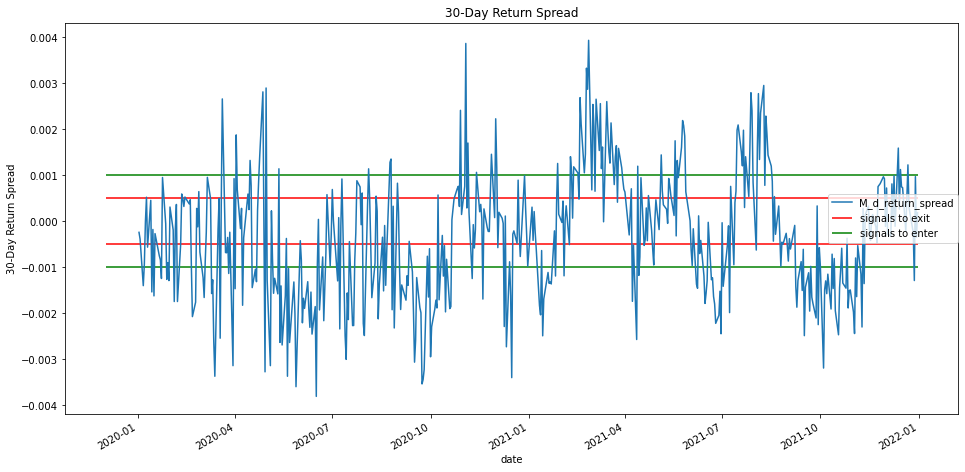

In [126]:
plt.figure()
return_spread = Spread_Reversion['M_d_return_spread'].plot(figsize=(16,8))
return_spread.hlines(y=0.0005, xmin='2019-12-02', xmax='2021-12-31', color='r', label='signals to exit')
return_spread.hlines(y=-0.0005, xmin='2019-12-02', xmax='2021-12-31', color='r')
return_spread.hlines(y=0.001, xmin='2019-12-02', xmax='2021-12-31', color='g', label='signals to enter')
return_spread.hlines(y=-0.001, xmin='2019-12-02', xmax='2021-12-31', color='g')
return_spread.set_title('30-Day Return Spread')
return_spread.set_ylabel('30-Day Return Spread')
plt.legend(loc="center right", borderaxespad=0)

### Simulating the trading strategy 

Given current position and signals, execute the trading strategy, and keep track of PnL, cumulative PnL, gross traded cash, cost.

In [131]:
def spread_trading_simulator(df, s): #s: proportion s of the gross traded cash (|$long| + |$short| at position entry time) when forced to exit
    Spread_Reversion = df.copy()
    
    cost = 0
    gross_traded_cash = 0
    
    Spread_Reversion['position'] = 0
    Spread_Reversion['PnL'] = 0
    Spread_Reversion['cum_PnL'] = 0
    
    for i in range(21,len(Spread_Reversion.index)):
        if i == len(Spread_Reversion.index)-1 or Spread_Reversion.index.month[i] != Spread_Reversion.index.month[i+1]:   #if month end, close out all positions
            Spread_Reversion['position'][i] = 0
            Spread_Reversion['FCOM_qty'][i] = 0
            Spread_Reversion['VOX_qty'][i] = 0
            Spread_Reversion['PnL'][i] = (Spread_Reversion['position'][i])*(Spread_Reversion['FCOM_qty'][i-1]*FCOM_data['adj_close'][i]-Spread_Reversion['VOX_qty'][i-1]*VOX_data['adj_close'][i]) - cost
            Spread_Reversion['cum_PnL'][i] = Spread_Reversion['cum_PnL'][i-1]+Spread_Reversion['PnL'][i]
            cost = 0
            gross_traded_cash = 0
            continue
        elif Spread_Reversion['position'][i-1] == -1: #currently on a short position
            if Spread_Reversion['exit_signal'][i] == -1: #stay short
                Spread_Reversion['position'][i] = -1
                Spread_Reversion['FCOM_qty'][i] = Spread_Reversion['FCOM_qty'][i-1]
                Spread_Reversion['VOX_qty'][i] = Spread_Reversion['VOX_qty'][i-1]
                Spread_Reversion['PnL'][i] = (-1)*(Spread_Reversion['FCOM_qty'][i]*FCOM_data['adj_close'][i]-Spread_Reversion['VOX_qty'][i]*VOX_data['adj_close'][i]) - cost
                Spread_Reversion['cum_PnL'][i] = Spread_Reversion['cum_PnL'][i-1]
            elif Spread_Reversion['enter_signal'][i] == 0: #exit from short
                Spread_Reversion['position'][i] = 0
                Spread_Reversion['FCOM_qty'][i] = 0
                Spread_Reversion['VOX_qty'][i] = 0
                Spread_Reversion['PnL'][i] = (-1)*(Spread_Reversion['FCOM_qty'][i-1]*FCOM_data['adj_close'][i]-Spread_Reversion['VOX_qty'][i-1]*VOX_data['adj_close'][i]) - cost
                Spread_Reversion['cum_PnL'][i] = Spread_Reversion['cum_PnL'][i-1] + Spread_Reversion['PnL'][i]
                cost = 0
                gross_traded_cash = 0
                continue
            else: #enter long position
                Spread_Reversion['position'][i] = 1
                Spread_Reversion['PnL'][i] = (-1)*(Spread_Reversion['FCOM_qty'][i-1]*FCOM_data['adj_close'][i]-Spread_Reversion['VOX_qty'][i-1]*VOX_data['adj_close'][i]) - cost
                Spread_Reversion['cum_PnL'][i] = Spread_Reversion['cum_PnL'][i-1] + Spread_Reversion['PnL'][i]
                cost = Spread_Reversion['FCOM_qty'][i]*FCOM_data['adj_close'][i]-Spread_Reversion['VOX_qty'][i]*VOX_data['adj_close'][i]
                gross_traded_cash = Spread_Reversion['FCOM_qty'][i]*FCOM_data['adj_close'][i]+Spread_Reversion['VOX_qty'][i]*VOX_data['adj_close'][i]
        elif Spread_Reversion['position'][i-1] == 1: #currently on a long position
            if Spread_Reversion['exit_signal'][i] == 1: #stay long
                Spread_Reversion['position'][i] = 1
                Spread_Reversion['FCOM_qty'][i] = Spread_Reversion['FCOM_qty'][i-1]
                Spread_Reversion['VOX_qty'][i] = Spread_Reversion['VOX_qty'][i-1]
                Spread_Reversion['PnL'][i] = (Spread_Reversion['FCOM_qty'][i]*FCOM_data['adj_close'][i]-Spread_Reversion['VOX_qty'][i]*VOX_data['adj_close'][i]) - cost
                Spread_Reversion['cum_PnL'][i] = Spread_Reversion['cum_PnL'][i-1]
            elif Spread_Reversion['enter_signal'][i] == 0: #exit from long
                Spread_Reversion['position'][i] = 0
                Spread_Reversion['FCOM_qty'][i] = 0
                Spread_Reversion['VOX_qty'][i] = 0
                Spread_Reversion['PnL'][i] = (Spread_Reversion['FCOM_qty'][i-1]*FCOM_data['adj_close'][i]-Spread_Reversion['VOX_qty'][i-1]*VOX_data['adj_close'][i]) - cost
                Spread_Reversion['cum_PnL'][i] = Spread_Reversion['cum_PnL'][i-1] + Spread_Reversion['PnL'][i]
                cost = 0
                gross_traded_cash = 0
                continue
            else: #enter short position
                Spread_Reversion['position'][i] = -1
                Spread_Reversion['PnL'][i] = (Spread_Reversion['FCOM_qty'][i-1]*FCOM_data['adj_close'][i]-Spread_Reversion['VOX_qty'][i-1]*VOX_data['adj_close'][i]) - cost
                Spread_Reversion['cum_PnL'][i] = Spread_Reversion['cum_PnL'][i-1] + Spread_Reversion['PnL'][i]
                cost = (-1)*(Spread_Reversion['FCOM_qty'][i]*FCOM_data['adj_close'][i]-Spread_Reversion['VOX_qty'][i]*VOX_data['adj_close'][i])
                gross_traded_cash = Spread_Reversion['FCOM_qty'][i]*FCOM_data['adj_close'][i]+Spread_Reversion['VOX_qty'][i]*VOX_data['adj_close'][i]
        else: #not holding anything
            if Spread_Reversion['enter_signal'][i] == 1: #enter long
                Spread_Reversion['position'][i] = 1
                Spread_Reversion['PnL'][i] = 0
                Spread_Reversion['cum_PnL'][i] = Spread_Reversion['cum_PnL'][i-1]
                cost = Spread_Reversion['FCOM_qty'][i]*FCOM_data['adj_close'][i]-Spread_Reversion['VOX_qty'][i]*VOX_data['adj_close'][i]
                gross_traded_cash = Spread_Reversion['FCOM_qty'][i]*FCOM_data['adj_close'][i]+Spread_Reversion['VOX_qty'][i]*VOX_data['adj_close'][i]
            elif Spread_Reversion['enter_signal'][i] == -1: #enter short
                Spread_Reversion['position'][i] = -1
                Spread_Reversion['PnL'][i] = 0
                Spread_Reversion['cum_PnL'][i] = Spread_Reversion['cum_PnL'][i-1]
                cost = (-1)*(Spread_Reversion['FCOM_qty'][i]*FCOM_data['adj_close'][i]-Spread_Reversion['VOX_qty'][i]*VOX_data['adj_close'][i])
                gross_traded_cash = Spread_Reversion['FCOM_qty'][i]*FCOM_data['adj_close'][i]+Spread_Reversion['VOX_qty'][i]*VOX_data['adj_close'][i]
            else: #continue holding nothing
                Spread_Reversion['position'][i] = 0
                Spread_Reversion['FCOM_qty'][i] = 0
                Spread_Reversion['VOX_qty'][i] = 0
                Spread_Reversion['PnL'][i] = 0
                Spread_Reversion['cum_PnL'][i] = Spread_Reversion['cum_PnL'][i-1]
                cost = 0
                gross_traded_cash = 0
                continue
                
        if Spread_Reversion['PnL'][i] < -s*gross_traded_cash:     #stop loss
            Spread_Reversion['position'][i] = 0
            Spread_Reversion['FCOM_qty'][i] = 0
            Spread_Reversion['VOX_qty'][i] = 0
            Spread_Reversion['PnL'][i] = (Spread_Reversion['position'][i])*(Spread_Reversion['FCOM_qty'][i-1]*FCOM_data['adj_close'][i]-Spread_Reversion['VOX_qty'][i-1]*VOX_data['adj_close'][i]) - cost
            Spread_Reversion['cum_PnL'][i] = Spread_Reversion['cum_PnL'][i-1]+Spread_Reversion['PnL'][i]
            cost = 0
            gross_traded_cash = 0
            
    return Spread_Reversion

In [45]:
#potential first trading starts at 2020-01-01
Spread_Reversion = spread_trading_simulator(Spread_Reversion,1).loc['2020-01-01':,:]

In [46]:
Spread_Reversion.tail(25)

,FCOM_15_med,VOX_15_med,Nt,FCOM_qty,VOX_qty,M_d_return_spread,enter_signal,exit_signal,position,PnL,cum_PnL
date,,,,,,,,,,,
2021-11-26,3.504449e+06,1.773356e+07,3.504449e+06,0.0,0.0,0.000814,0,-1,0,0,2574
2021-11-29,3.504449e+06,1.871619e+07,3.504449e+06,0.0,0.0,0.000964,0,-1,0,0,2574
2021-11-30,3.504449e+06,2.118923e+07,3.504449e+06,0.0,0.0,0.000922,0,-1,0,0,2574
2021-12-01,3.504449e+06,2.140671e+07,3.504449e+06,0.0,0.0,-0.000114,0,0,0,0,2574
2021-12-02,3.613346e+06,2.301619e+07,3.613346e+06,0.0,0.0,0.000720,0,-1,0,0,2574
2021-12-03,4.414208e+06,2.586912e+07,4.414208e+06,0.0,0.0,-0.000284,0,0,0,0,2574
2021-12-06,4.516232e+06,2.586912e+07,4.516232e+06,0.0,0.0,-0.000318,0,0,0,0,2574
2021-12-07,4.516232e+06,2.586912e+07,4.516232e+06,0.0,0.0,0.000809,0,-1,0,0,2574
2021-12-08,4.516232e+06,2.586912e+07,4.516232e+06,0.0,0.0,0.000063,0,0,0,0,2574


In [47]:
pnl = Spread_Reversion['cum_PnL'][-1]
print('Cumulative PnL is ${}.'.format(pnl))

Cumulative PnL is $2666.


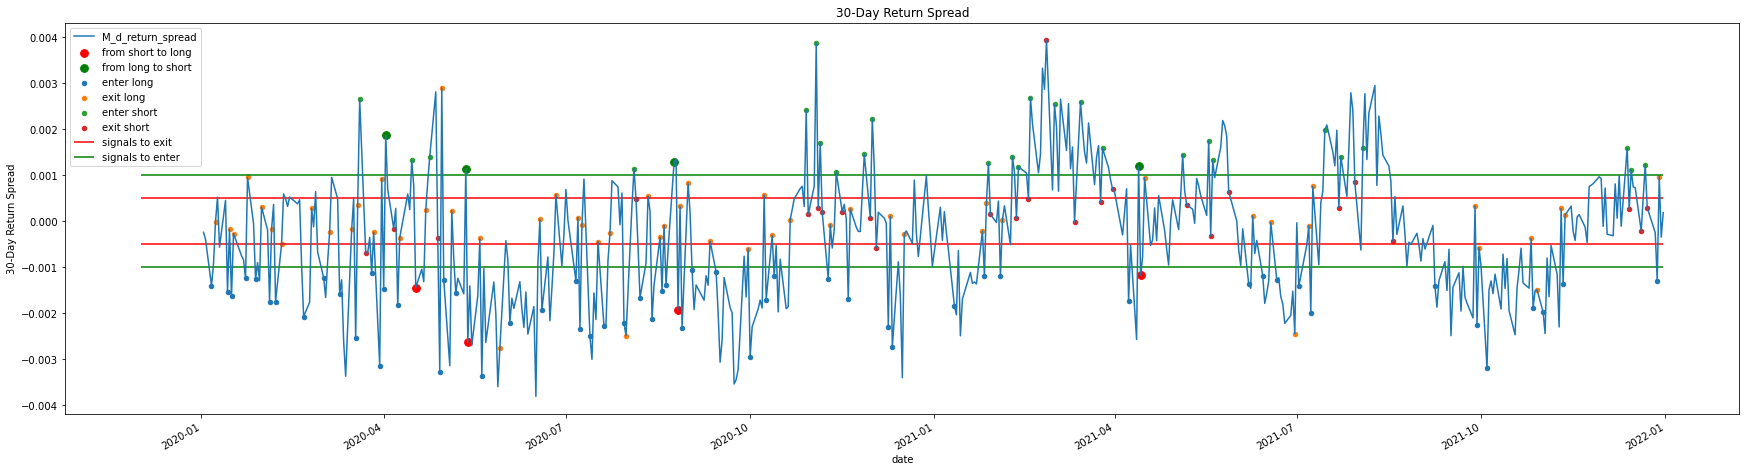

In [77]:
plt.figure()
y_short_long = Spread_Reversion[Spread_Reversion['position'].diff()==2]
y_long_short = Spread_Reversion[Spread_Reversion['position'].diff()==-2]
y_enter_long = Spread_Reversion[(Spread_Reversion['position'].diff()==1) & (Spread_Reversion['position']==1)]
y_exit_long = Spread_Reversion[(Spread_Reversion['position'].diff()==-1) & (Spread_Reversion['position']==0)]
y_enter_short = Spread_Reversion[(Spread_Reversion['position'].diff()==-1) & (Spread_Reversion['position']==-1)]
y_exit_short = Spread_Reversion[(Spread_Reversion['position'].diff()==1) & (Spread_Reversion['position']==0)]

signal = plt.scatter(x=y_short_long.index, y=y_short_long['M_d_return_spread'],label='from short to long',s=60,c='r')
signal = plt.scatter(x=y_long_short.index, y=y_long_short['M_d_return_spread'],label='from long to short',s=60,c='g')
signal = plt.scatter(x=y_enter_long.index, y=y_enter_long['M_d_return_spread'],label='enter long',s=20)
signal = plt.scatter(x=y_exit_long.index, y=y_exit_long['M_d_return_spread'],label='exit long',s=20)
signal = plt.scatter(x=y_enter_short.index, y=y_enter_short['M_d_return_spread'],label='enter short',s=20)
signal = plt.scatter(x=y_exit_short.index, y=y_exit_short['M_d_return_spread'],label='exit short',s=20)

signal = Spread_Reversion['M_d_return_spread'].plot(figsize=(30,8))
signal.hlines(y=0.0005, xmin='2019-12-02', xmax='2021-12-31', color='r', label='signals to exit')
signal.hlines(y=-0.0005, xmin='2019-12-02', xmax='2021-12-31', color='r')
signal.hlines(y=0.001, xmin='2019-12-02', xmax='2021-12-31', color='g', label='signals to enter')
signal.hlines(y=-0.001, xmin='2019-12-02', xmax='2021-12-31', color='g')
signal.set_title('30-Day Return Spread')
signal.set_ylabel('30-Day Return Spread')
signal.legend(loc="upper left")

### Return on Capital

In [132]:
Spread_Reversion['Cum_Max_Nt'] = Spread_Reversion['Nt'].cummax()

In [133]:
#ROC in percentage points
Spread_Reversion['ROC'] = Spread_Reversion['PnL']/(2*Spread_Reversion['Cum_Max_Nt']/100)*100

Text(0, 0.5, 'ROC (%)')

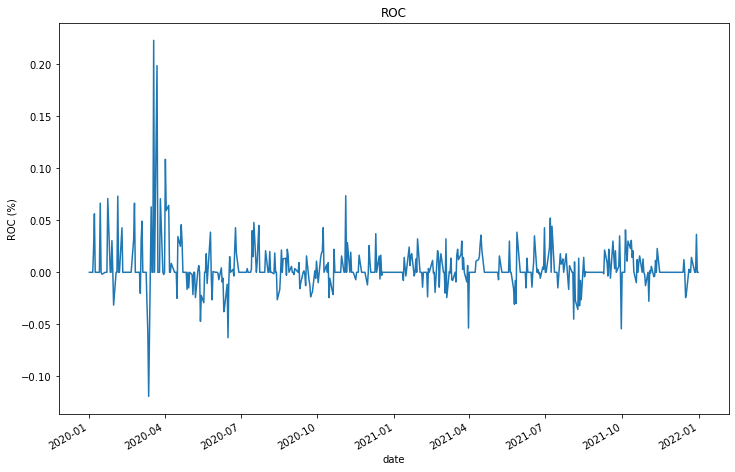

In [134]:
plt.figure()
roc = Spread_Reversion['ROC'].plot(figsize=(12,8))
roc.set_title('ROC')
roc.set_ylabel('ROC (%)')

In [135]:
#Cumulative ROC in percentage points
Spread_Reversion['cum_ROC'] = Spread_Reversion['cum_PnL']/(2*Spread_Reversion['Cum_Max_Nt']/100)*100

Text(0, 0.5, 'Cumulative ROC (%)')

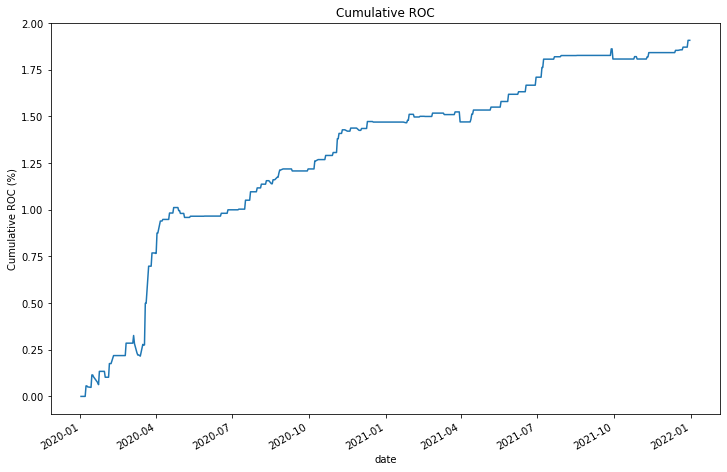

In [136]:
plt.figure()
cum_roc = Spread_Reversion['cum_ROC'].plot(figsize=(12,8))
cum_roc.set_title('Cumulative ROC')
cum_roc.set_ylabel('Cumulative ROC (%)')

## Try other combinations of parameters, and compare the results

### First fix s to be 1, so that we do not consider stop loss at this point of time.

In [54]:
M = [5,10,15,30,60]
g = np.linspace(0.0005,0.001,20)
j = np.linspace(0.00025,0.0005,20)
s = [1]
#s = np.linspace(0.001,0.005,5)

In [55]:
cum_PnL_params = pd.DataFrame(columns=['cum_PnL','M','g','j','s'])

for w in M:
    for i in range(len(g)):
        x = g[i]
        y = j[i]
        for z in s:

            cum_pnl = spread_trading_simulator(signals(M_day_rolling_return(data,FCOM_data,VOX_data,w),x,y),z).loc['2020-01-01':,:]['cum_PnL'][-1]
            cum_PnL_params.loc[len(cum_PnL_params.index)] = [cum_pnl,w,x,y,z]
    
    

In [56]:
cum_PnL_params.sort_values(by=['cum_PnL'],ascending=False).head(10)

,cum_PnL,M,g,j,s
9,5646.0,5.0,0.000737,0.000368,1.0
10,5589.0,5.0,0.000763,0.000382,1.0
8,5566.0,5.0,0.000711,0.000355,1.0
11,5552.0,5.0,0.000789,0.000395,1.0
12,5521.0,5.0,0.000816,0.000408,1.0
0,5508.0,5.0,0.000500,0.000250,1.0
3,5467.0,5.0,0.000579,0.000289,1.0
14,5451.0,5.0,0.000868,0.000434,1.0
15,5438.0,5.0,0.000895,0.000447,1.0
1,5435.0,5.0,0.000526,0.000263,1.0


### Plot versus cumulative PnL versus different parameters 

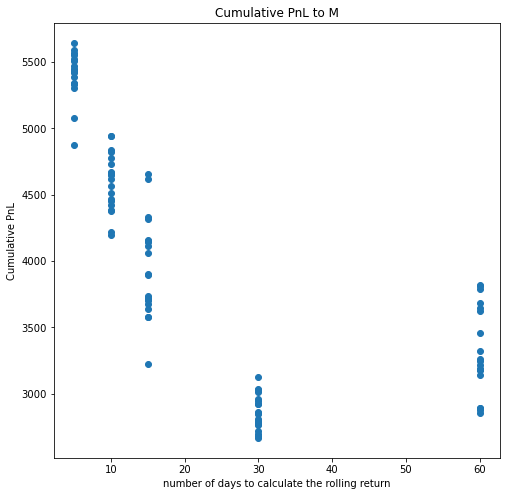

In [57]:
fig, m_plot = plt.subplots(figsize=(8,8))
m_plot.set_title('Cumulative PnL to M')
m_plot.set_ylabel('Cumulative PnL')
m_plot.set_xlabel('number of days to calculate the rolling return')
m_plot = plt.scatter(x=cum_PnL_params['M'],y=cum_PnL_params['cum_PnL'])

From the grid results, it is most striking that in general, with larger M, the cumulative PnL is much lower. Data points are most widely scattered at M=15

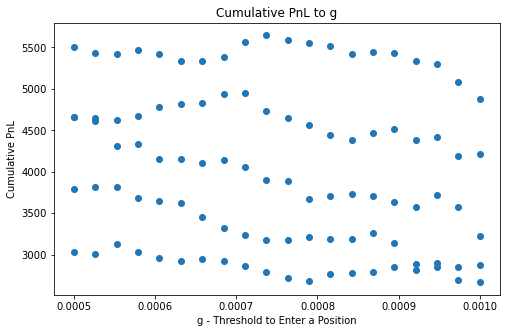

In [58]:
fig, g_plot = plt.subplots(figsize=(8,5))
g_plot.set_title('Cumulative PnL to g')
g_plot.set_ylabel('Cumulative PnL')
g_plot.set_xlabel('g - Threshold to Enter a Position')
g_plot = plt.scatter(x=cum_PnL_params['g'],y=cum_PnL_params['cum_PnL'])

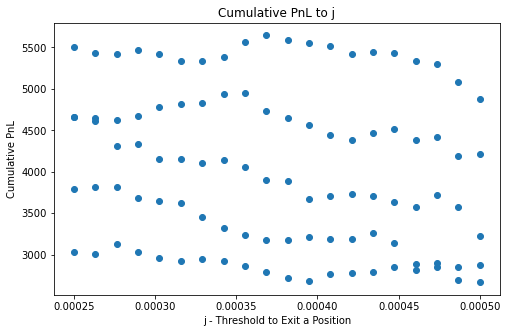

In [59]:
fig, j_plot = plt.subplots(figsize=(8,5))
j_plot.set_title('Cumulative PnL to j')
j_plot.set_ylabel('Cumulative PnL')
j_plot.set_xlabel('j - Threshold to Exit a Position')
j_plot = plt.scatter(x=cum_PnL_params['j'],y=cum_PnL_params['cum_PnL'])

### Now fix M to be 15, s=1, try different combinations for g and j.

In [60]:
g1 = np.linspace(0.0005,0.001,10)
j1 = np.linspace(0.00025,0.0005,10)

In [61]:
cum_PnL_gj = pd.DataFrame(columns=['cum_PnL','M','g','j','s'])

for a in g1:
    for b in j1:
            cum_pnl_2 = spread_trading_simulator(signals(M_day_rolling_return(data,FCOM_data,VOX_data,15),a,b),1).loc['2020-01-01':,:]['cum_PnL'][-1]
            cum_PnL_gj.loc[len(cum_PnL_gj.index)] = [cum_pnl_2,15,a,b,1]

In [62]:
cum_PnL_gj.sort_values(by=['cum_PnL'],ascending=False).head(10)

,cum_PnL,M,g,j,s
8,4845.0,15.0,0.0005,0.000472,1.0
7,4796.0,15.0,0.0005,0.000444,1.0
9,4795.0,15.0,0.0005,0.000500,1.0
6,4792.0,15.0,0.0005,0.000417,1.0
4,4672.0,15.0,0.0005,0.000361,1.0
5,4669.0,15.0,0.0005,0.000389,1.0
0,4657.0,15.0,0.0005,0.000250,1.0
1,4613.0,15.0,0.0005,0.000278,1.0
2,4605.0,15.0,0.0005,0.000306,1.0
3,4605.0,15.0,0.0005,0.000333,1.0


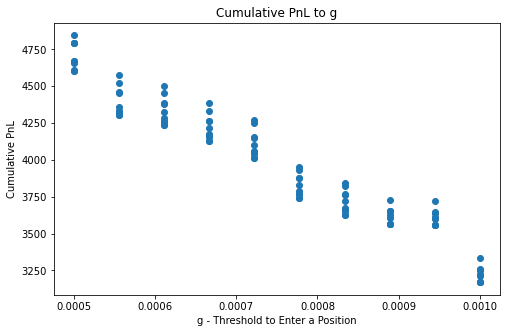

In [63]:
fig, g_plot_2 = plt.subplots(figsize=(8,5))
g_plot_2.set_title('Cumulative PnL to g')
g_plot_2.set_ylabel('Cumulative PnL')
g_plot_2.set_xlabel('g - Threshold to Enter a Position')
g_plot_2 = plt.scatter(x=cum_PnL_gj['g'],y=cum_PnL_gj['cum_PnL'])

As g increases from 0.0005 to 0.001, cumulative PnL almost continuously decreases.

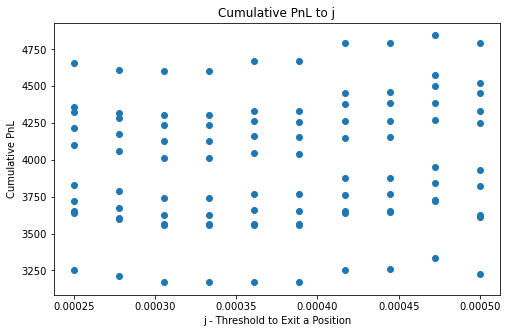

In [64]:
fig, j_plot_2 = plt.subplots(figsize=(8,5))
j_plot_2.set_title('Cumulative PnL to j')
j_plot_2.set_ylabel('Cumulative PnL')
j_plot_2.set_xlabel('j - Threshold to Exit a Position')
j_plot_2 = plt.scatter(x=cum_PnL_gj['j'],y=cum_PnL_gj['cum_PnL'])

### Try different values of s

s should be smaller than around .0015 in order to be effective. Any value above that will make no difference to our analysis.

In [71]:
s_1 = np.linspace(0,0.0015,20)

In [72]:
cum_PnL_s = pd.DataFrame(columns=['cum_PnL','M','g','j','s'])

In [73]:
for c in s_1:
            cum_pnl_3 = spread_trading_simulator(signals(M_day_rolling_return(data,FCOM_data,VOX_data,15),0.0006,0.0003),c).loc['2020-01-01':,:]['cum_PnL'][-1]
            cum_PnL_s.loc[len(cum_PnL_s.index)] = [cum_pnl_3,15,0.0005,0.0003,c]

In [74]:
cum_PnL_s.sort_values(by=['cum_PnL'],ascending=False).head(10)

,cum_PnL,M,g,j,s
6,4485.0,15.0,0.0005,0.0003,0.000474
7,4461.0,15.0,0.0005,0.0003,0.000553
8,4229.0,15.0,0.0005,0.0003,0.000632
16,4227.0,15.0,0.0005,0.0003,0.001263
18,4204.0,15.0,0.0005,0.0003,0.001421
17,4204.0,15.0,0.0005,0.0003,0.001342
12,4177.0,15.0,0.0005,0.0003,0.000947
15,4177.0,15.0,0.0005,0.0003,0.001184
14,4177.0,15.0,0.0005,0.0003,0.001105
13,4177.0,15.0,0.0005,0.0003,0.001026


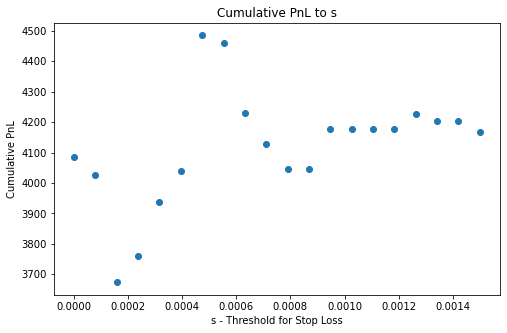

In [75]:
fig, s_plot = plt.subplots(figsize=(8,5))
s_plot.set_title('Cumulative PnL to s')
s_plot.set_ylabel('Cumulative PnL')
s_plot.set_xlabel('s - Threshold for Stop Loss')
s_plot = plt.scatter(x=cum_PnL_s['s'],y=cum_PnL_s['cum_PnL'])

With very small value of s, the cumulative PnL is small, indicating that the trading strategy might be too conservative. S around about 0.0005 might be optimal in this case.

## Compare Strategy Returns to Market Returns

In [78]:
returns = pd.DataFrame(columns=['r_strategy','r_M', 'SMB','HML','r_f'])

In [85]:
#M=5, g=0.0005, j=0.00025, s=0.0005
strategy_result = spread_trading_simulator(
    signals(
        M_day_rolling_return(
            data,FCOM_data,VOX_data,5),0.0005,0.00025),0.0005).loc['2020-01-01':,:]

In [87]:
strategy_result.tail()

,FCOM_15_med,VOX_15_med,Nt,FCOM_qty,VOX_qty,M_d_return_spread,enter_signal,exit_signal,position,PnL,cum_PnL
date,,,,,,,,,,,
2021-12-27,4.856835e+06,2.298499e+07,4.856835e+06,933.0,353.0,-0.000642,1,1,1,0,5394
2021-12-28,4.727869e+06,2.298499e+07,4.727869e+06,0.0,0.0,-0.000120,0,0,0,-8,5386
2021-12-29,4.433093e+06,2.244340e+07,4.433093e+06,857.0,325.0,0.000646,-1,-1,-1,0,5386
2021-12-30,4.433093e+06,2.196250e+07,4.433093e+06,0.0,0.0,-0.000346,0,1,0,10,5396
2021-12-31,4.433093e+06,1.877709e+07,4.433093e+06,0.0,0.0,-0.000420,0,1,0,0,5396


In [101]:
#maximum Nt/100 as our initial capital
initial_capital = strategy_result['Nt'].max()/100

In [102]:
initial_capital

69918.0247013113

In [140]:
returns['r_strategy'] = (strategy_result['cum_PnL']/(2*initial_capital))*100

In [141]:
returns[['r_M','SMB','HML','r_f']] = FF_data[['Mkt-RF','SMB','HML','RF']]

In [142]:
returns = returns.fillna(0)

In [143]:
returns.head()

,r_strategy,r_M,r_f,SMB,HML
date,,,,,
2020-01-02,0.000000,0.86,0.006,-0.89,-0.32
2020-01-03,0.000000,-0.67,0.006,0.39,0.00
2020-01-06,0.000000,0.36,0.006,-0.07,-0.54
2020-01-07,0.005721,-0.19,0.006,-0.01,-0.25
2020-01-08,0.005721,0.47,0.006,-0.06,-0.65


In [124]:
X = sm.add_constant(returns[['r_M','SMB','HML','r_f']])
y = returns['r_strategy']
reg = sm.OLS(y,X).fit()

In [125]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             r_strategy   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     138.4
Date:                Wed, 26 Jan 2022   Prob (F-statistic):           1.62e-79
Time:                        22:09:25   Log-Likelihood:                -917.69
No. Observations:                 505   AIC:                             1845.
Df Residuals:                     500   BIC:                             1867.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4221      0.071     75.932      0.000       5.282       5.562
r_M           -0.0489      0.042     -1.172      0.242      -0.131       0.033
SMB           -0.0996      0.081     -1.231      0.219      -0.259       0.059
HML            0.0505      0.050      1.003      0.316      -0.048       0.149
r_f         -795.8726     34.125    -23.322      0.000    -862.919    -728.826
==============================================================================
Omnibus:                      111.693   Durbin-Watson:                   0.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.940
Skew:                          -0.229   Prob(JB):                     2.33e-06
Kurtosis:                       1.988   Cond. No.                         876.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The OLS regression results shows that the coefficients on none of three factors of Fama French model is statictically significant. Thus, market return, SMB, HML cannot well explain the returns in our trading strategy. The strategy is rewarding in that it rules out these trends well known to general investors.